In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv(r'C:\Users\Vasilis\Downloads\Telecom Customers\Telecom Customers Churn.csv')

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['tenure'] = pd.to_numeric(df['tenure'])
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

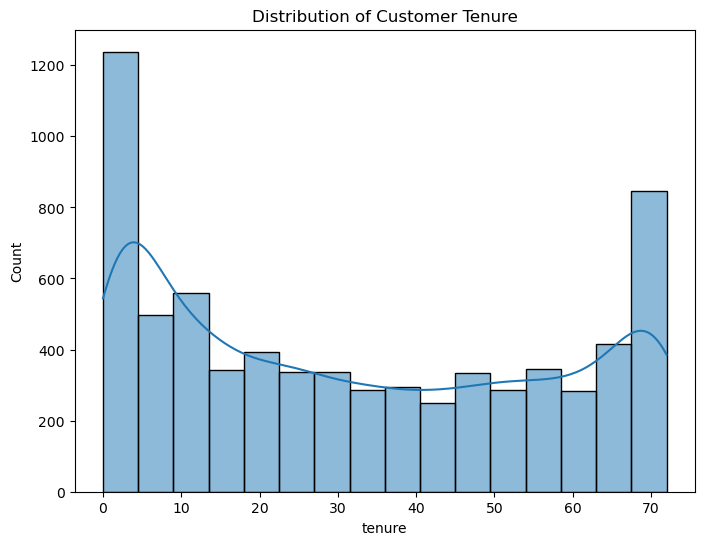

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Customer Tenure')
plt.show()

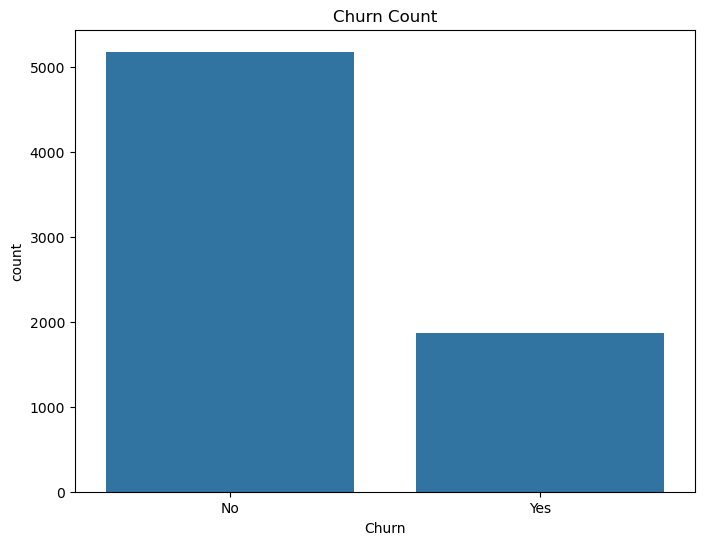

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()

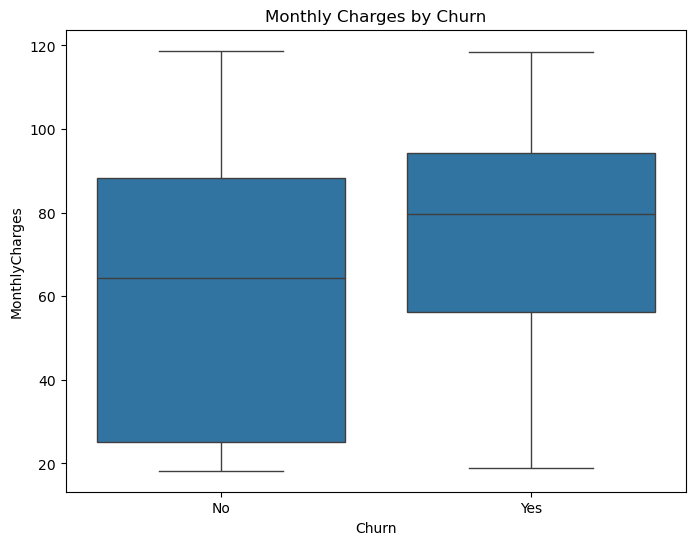

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

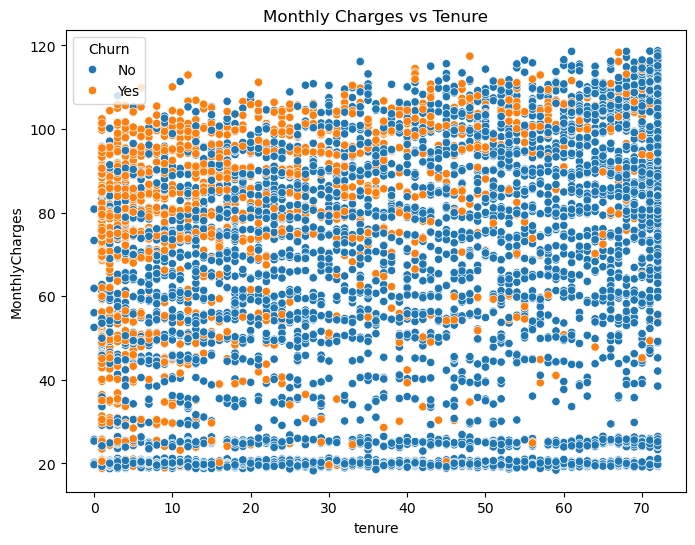

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Tenure')
plt.show()

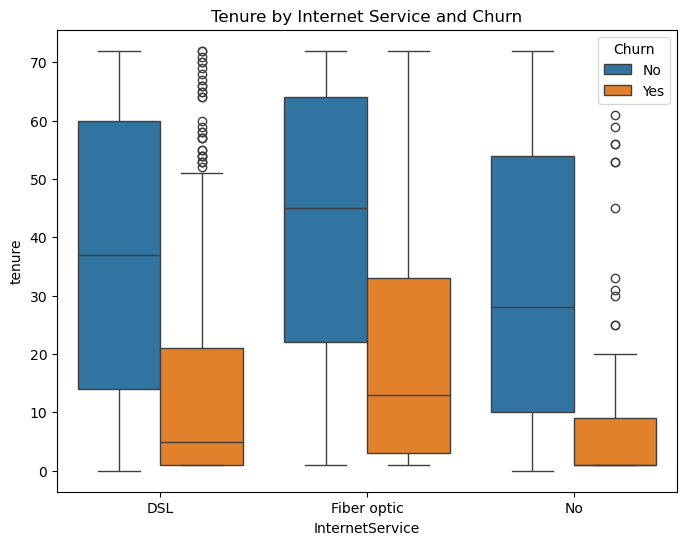

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='InternetService', y='tenure', hue='Churn', data=df)
plt.title('Tenure by Internet Service and Churn')
plt.show()

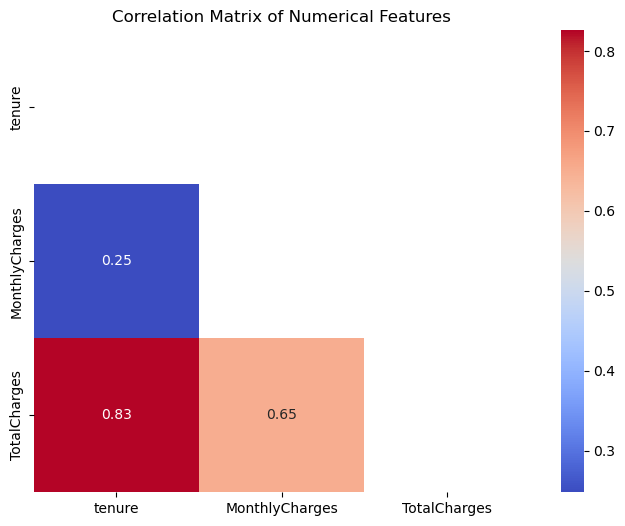

In [49]:
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask = mask)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [51]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12 months', '13-24 months', '25-48 months', '49-72 months'])

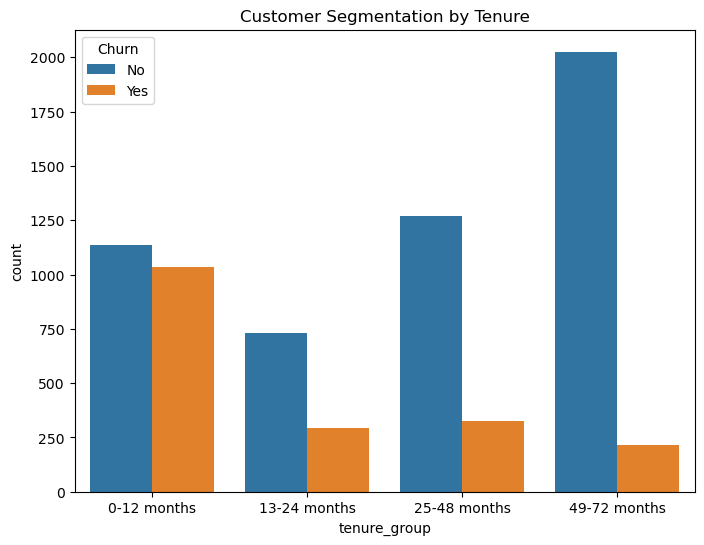

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='tenure_group', data=df, hue='Churn')
plt.title('Customer Segmentation by Tenure')
plt.show()

In [55]:
df['monthly_charges_group'] = pd.cut(df['MonthlyCharges'], bins=[0, 35, 70, 105], labels=['Low', 'Medium', 'High'])

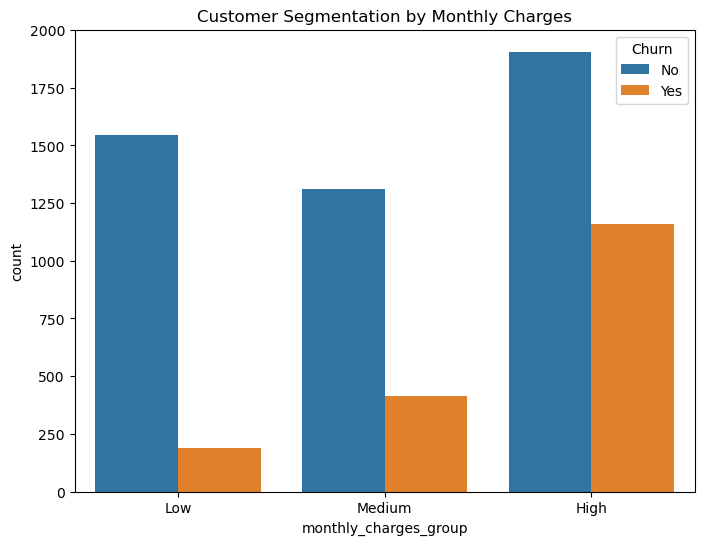

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='monthly_charges_group', data=df, hue='Churn')
plt.title('Customer Segmentation by Monthly Charges')
plt.show()

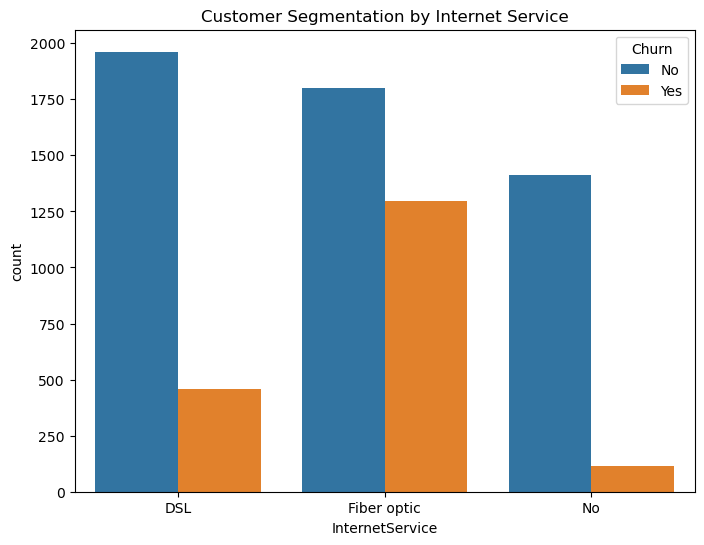

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.title('Customer Segmentation by Internet Service')
plt.show()